In [2]:
# 2.3. Cho dữ liệu có chứa thông tin về các khách hàng: mã khách hàng, giới tính, tuổi, thu
# nhập hàng năm và điểm tiết kiệm (1-100) lưu trong tệp mall_customers.csv
# a) Viết chương trình sử dụng thuật toán K-mean để phân cụm dữ liệu trên thành k
# cụm (k = 2, 3, 4, 5)
# b) Trực quan hóa các cụm dữ liệu ứng với các k ở câu 2.1.a)

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder

In [4]:
# a) Viết chương trình sử dụng thuật toán K-mean để phân cụm dữ liệu trên thành k
# cụm (k = 2, 3, 4, 5)
df=pd.read_csv('Mall_Customers.csv')
df.tail(5)

,CustomerID,Gender,Age,Annual Income,Spending Score (1-100)
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18
199,200,Male,30,137,83


In [5]:
# Trực quan hóa dữ liệu
label_encoder=LabelEncoder()
df['Gender']=label_encoder.fit_transform(df['Gender'])
df.tail(5)

,CustomerID,Gender,Age,Annual Income,Spending Score (1-100)
195,196,0,35,120,79
196,197,0,45,126,28
197,198,1,32,126,74
198,199,1,32,137,18
199,200,1,30,137,83


In [6]:
# Chọn các cột cần thiết cho quá trình phân cụm
X=df[['Age','Annual Income','Spending Score (1-100)']].values
# Áp dụng K-means với k = 2, 3, 4, 5
for k in [2, 3, 4, 5]:
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X)
    
    print(f"\nK = {k}:")
    print(f"Tâm cụm (cluster centers):\n{kmeans.cluster_centers_}")
    print(f"Nhãn cụm (cluster labels):\n{labels[:10]}...")  # Hiển thị 10 nhãn đầu tiên


K = 2:
Tâm cụm (cluster centers):
[[40.33552632 50.90789474 43.63157895]
 [34.14583333 91.125      71.        ]]
Nhãn cụm (cluster labels):
[0 0 0 0 0 0 0 0 0 0]...

K = 3:
Tâm cụm (cluster centers):
[[44.48387097 59.87903226 35.42741935]
 [32.97560976 88.73170732 79.24390244]
 [25.77142857 29.97142857 68.51428571]]
Nhãn cụm (cluster labels):
[2 2 0 2 2 2 0 2 0 2]...

K = 4:
Tâm cụm (cluster centers):
[[44.89473684 48.70526316 42.63157895]
 [32.69230769 86.53846154 82.12820513]
 [24.82142857 28.71428571 74.25      ]
 [40.39473684 87.         18.63157895]]
Nhãn cụm (cluster labels):
[2 2 0 2 0 2 0 2 0 2]...

K = 5:
Tâm cụm (cluster centers):
[[ 46.21348315  47.71910112  41.79775281]
 [ 32.45454545 108.18181818  82.72727273]
 [ 24.68965517  29.5862069   73.65517241]
 [ 40.39473684  87.          18.63157895]
 [ 31.78787879  76.09090909  77.75757576]]
Nhãn cụm (cluster labels):
[2 2 0 2 0 2 0 2 0 2]...


In [21]:
# Hàm phân cụm và trực quan hóa
def cluster_and_visualize(X, k_values):
    for k in k_values:
        # Áp dụng K-means
        kmeans = KMeans(n_clusters=k, random_state=42)
        labels = kmeans.fit_predict(X)  
        pca = PCA(n_components=2)
        X_reduced = pca.fit_transform(X)
        # Trực quan hóa kết quả (chỉ với 2 cột đầu tiên để dễ dàng vẽ)
        plt.figure(figsize=(8, 6))
        plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', marker='o', edgecolor='k', s=50)
        plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], 
                    c='red', marker='X', s=200, label='Tâm cụm')
        plt.title(f'Phân cụm K-means với k = {k}')
        plt.xlabel('Age')
        plt.ylabel('Annual Income (k$)')
        plt.legend()
        plt.grid(True)
        plt.show()

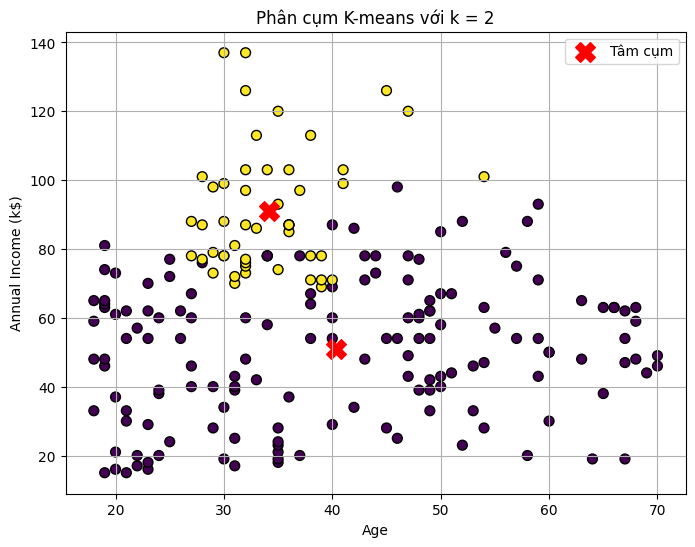

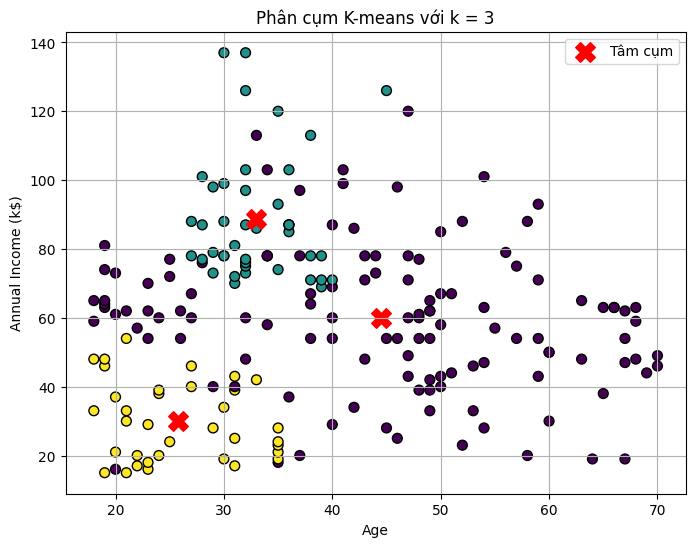

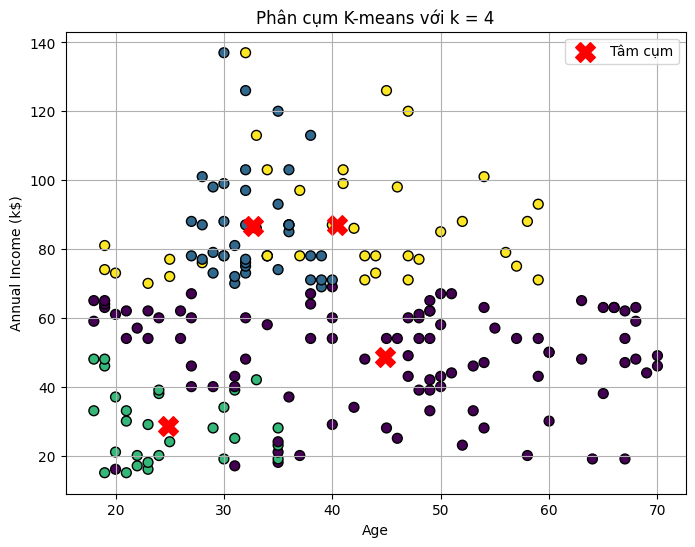

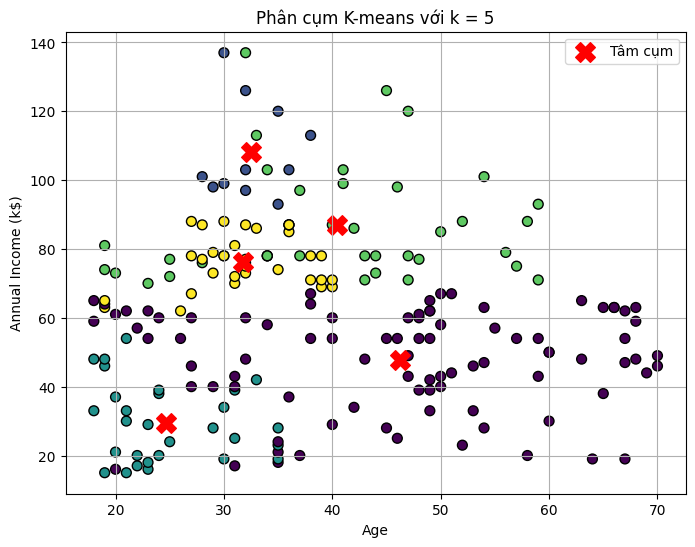

In [20]:
# Trực quan hóa dữ liệu
cluster_and_visualize(X,k_values=[2,3,4,5])

In [22]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

def cluster_and_visualize(X, k_values):
    for k in k_values:
        # Áp dụng K-means
        kmeans = KMeans(n_clusters=k, random_state=42)
        labels = kmeans.fit_predict(X)
        
        # Giảm chiều dữ liệu xuống 3 chiều (nếu cần)
        pca = PCA(n_components=3)
        X_reduced = pca.fit_transform(X)
        
        # Trực quan hóa kết quả trên mặt phẳng 3D
        fig = plt.figure(figsize=(10, 8))
        ax = fig.add_subplot(111, projection='3d')
        
        # Vẽ các điểm dữ liệu
        ax.scatter(X_reduced[:, 0], X_reduced[:, 1], X_reduced[:, 2], c=labels, cmap='viridis', marker='o', edgecolor='k', s=50)
        
        # Vẽ các tâm cụm
        ax.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], kmeans.cluster_centers_[:, 2], 
                   c='red', marker='X', s=200, label='Tâm cụm')
        
        # Thiết lập tiêu đề và nhãn trục
        ax.set_title(f'Phân cụm K-means với k = {k}')
        ax.set_xlabel('PCA Component 1')
        ax.set_ylabel('PCA Component 2')
        ax.set_zlabel('PCA Component 3')
        
        # Hiển thị bảng chú giải và lưới
        ax.legend()
        ax.grid(True)
        
        # Hiển thị đồ thị
        plt.show()


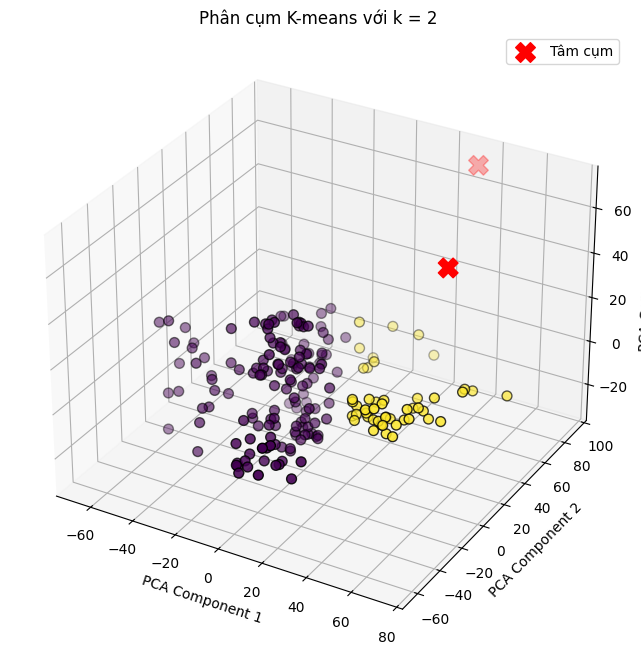

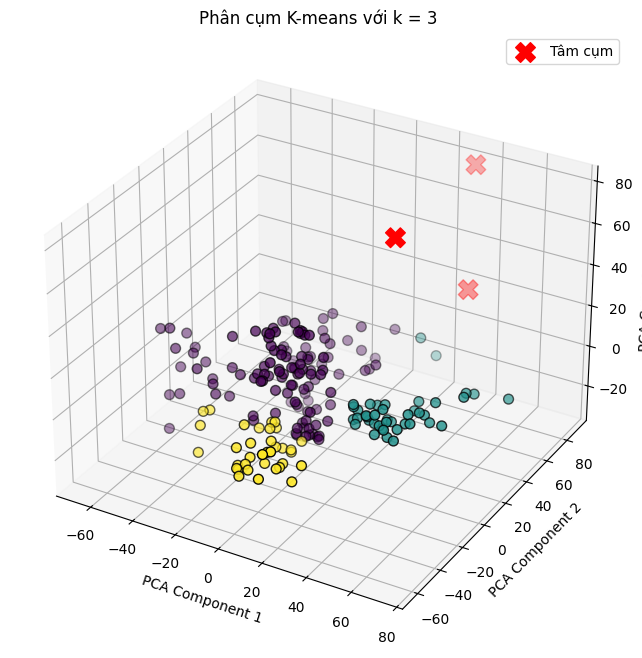

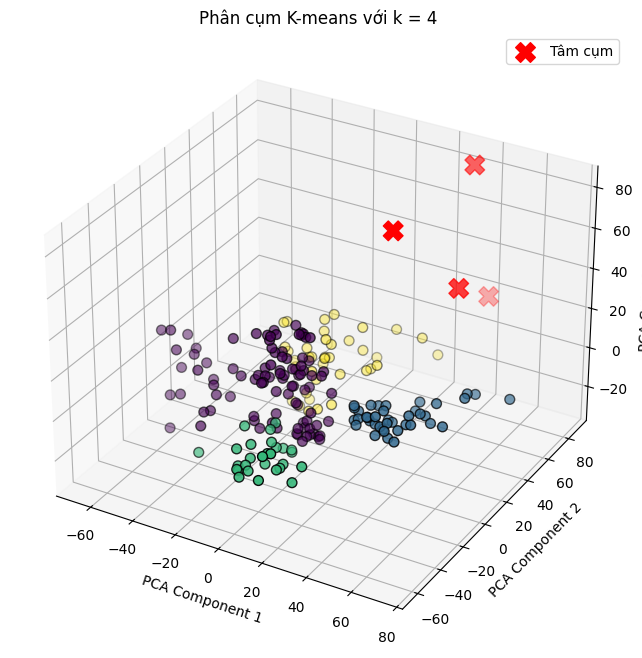

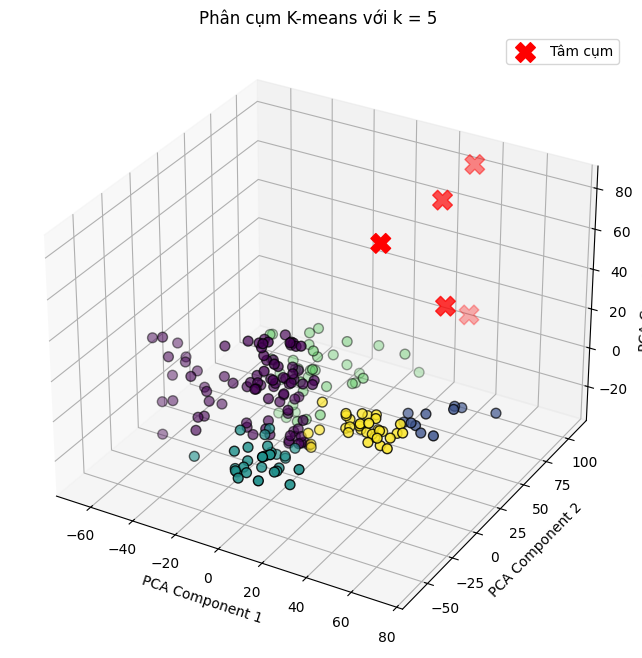

In [23]:
cluster_and_visualize(X,k_values=[2,3,4,5])